# Ceneo Analyzer

# Biblioteki

In [139]:
import os
import pandas as pd
from matplotlib import pyplot as pit
import numpy as np

# Lista kodów wszystkich produktów, o których zaostał pobrane opinie

In [140]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

120498791
156802519
{opinion_id}


# Kod produktu, dla którego ma zostać wykonana analiza opinii

In [141]:
product_id = input("Podaj kod produktu w serwisie Ceneo.pl: ")

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [142]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [143]:
opinions

,opinion_id,author,recomendation,rating,content,pros,cons,useful,useless,publish_date,purchase_date
0,18387464,MIODAR,Polecam,5/5,Jest to mój pierwszy tego typu blender. Postan...,"[bezpieczny, bezprzewodowy, duża moc, eleganck...",[],0,0,2024-02-11 04:05:41,2024-02-03 10:38:15
1,18537596,kasiulek,Polecam,5/5,"Rewelacyjny, piękny dizajn, posiadam kolor mie...","[elegancki wygląd, ładny design, szybka wysyłk...",[],0,0,2024-03-30 08:31:50,2024-03-28 07:32:50
2,18359374,Natalia,Polecam,5/5,"Dopiero zaczynam przygodę z Blendy, ale:\nJest...","[bezprzewodowy, elegancki wygląd, ładny design...",[],0,0,2024-02-01 19:23:06,2024-01-28 14:47:11
3,18394372,angelikasitek26,Polecam,5/5,Produkt bardzo solidnie wykonany. Piękny żywy ...,"[bezprzewodowy, elegancki wygląd, ładny design...",[],0,0,2024-02-13 13:50:51,2024-02-11 23:30:15
4,18590279,m...0,Polecam,5/5,"Bardzo fajnie urządzenie, w podróży nie trzeba...","[elegancki wygląd, ładny design, szybka wysyłk...",[],0,0,2024-04-20 06:28:13,2024-04-10 07:08:52
...,...,...,...,...,...,...,...,...,...,...,...
131,18002927,Użytkownik Ceneo,Polecam,5/5,Czekałem na premierę wersji 3 i się nie zawiod...,[],[],0,0,2023-10-15 19:52:06,None
132,18057101,Użytkownik Ceneo,Polecam,5/5,To mój pierwszy blender od Blendy go i jest to...,"[bezprzewodowy, elegancki wygląd, można pić z ...",[],0,0,2023-11-01 20:12:48,None
133,18022873,Dmitrij,Polecam,5/5,blender jest świetny. Szukałem przenośnego. Do...,"[bezprzewodowy, elegancki wygląd, można pić z ...",[],0,0,2023-10-20 17:53:20,None
134,17903116,Użytkownik Ceneo,Polecam,5/5,Jest super😀,[],[],0,0,2023-09-14 21:25:19,None


## Przekształcenie danych

In [144]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split("/")[0].replace(",",".")).astype(float)

# Podstawowe statystyki

In [145]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

# Histogram częstości poszczgólnych ocen w opiniach o produkcie

rating
0.0      0.0
0.5      2.0
1.0      0.0
1.5      0.0
2.0      0.0
2.5      1.0
3.0      1.0
3.5      1.0
4.0      1.0
4.5      9.0
5.0    121.0
Name: count, dtype: float64


[Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '9'),
 Text(0, 0, '121')]

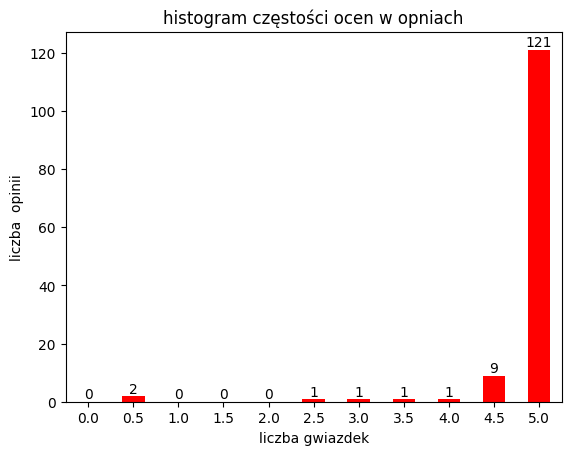

In [146]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5),fill_value=0.0)
print(rating_distribution)
fig, ax = pit.subplots()
rating_distribution.plot.bar(color="red")
pit.xticks(rotation=0)
pit.xlabel("liczba gwiazdek")
pit.ylabel("liczba  opinii")
pit.title("histogram częstości ocen w opniach")
ax.bar_label(ax.containers[0], label_type="edge")


# Udział poszczególnych rekomednacji w opiniach

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

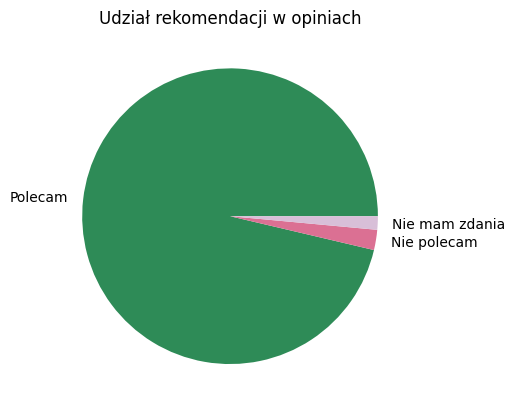

In [147]:
recommendation_distribution = opinions.recomendation.value_counts(dropna=False).reindex(["Polecam","Nie polecam", None])
recommendation_distribution
recommendation_distribution.plot.pie(
    label="",
    colors = ["seagreen","palevioletred", "thistle"],
    labels = ["Polecam","Nie polecam", "Nie mam zdania"]
)
pit.title("Udział rekomendacji w opiniach")
#156802519